In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# RoBERTa

In [3]:
with open('run-metrics-roberta-base.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8548075556755066, 'full_set_var_values': [0.04348822683095932, 0.035667601972818375, 0.02847617119550705, 0.024566346779465675, 0.019576048478484154, 0.017785390838980675, 0.016573002561926842, 0.015938039869070053, 0.014675590209662914, 0.014156904071569443, 0.013434045948088169, 0.013030113652348518, 0.01170832198113203, 0.01103251799941063, 0.010710635222494602, 0.010331254452466965, 0.009816947393119335, 0.009449420496821404, 0.009226726368069649, 0.008620928972959518, 0.00836295634508133, 0.007970518432557583, 0.007848026230931282, 0.007581137120723724, 0.007324179634451866, 0.006992239039391279, 0.006736306007951498, 0.006506618112325668, 0.0062790862284600735, 0.006236234679818153, 0.006075234152376652, 0.006041933782398701, 0.006000405643135309, 0.005873729009181261, 0.00577862374484539, 0.0055580404587090015, 0.005435663275420666, 0.0052622356452047825, 0.005245286505669355, 0.005231725051999092, 0.005039181560277939, 0.0049919192679

In [4]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']
subset_sizes = modelling_metrics['subset_size']

In [5]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [6]:
file_list = glob.glob('./Eval-Results-roberta-base/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [7]:
results = {}

In [8]:
results['subset_size'] = modelling_metrics['subset_size']
results['r2_value'] = variance_metrics['r2_values']
results['test_accuracy'] = modelling_metrics['test_accuracies']
results['test_loss'] = modelling_metrics['test_losses']

In [9]:
subset_sizes = modelling_metrics['subset_size']

for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [10]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value,test_accuracy,test_loss,imdb_loss,imdb_accuracy,sst2_loss,sst2_accuracy,yelp_loss,yelp_accuracy
0,2776,0.841186,0.768191,0.512355,0.515566,0.74100,0.595073,0.764273,0.414575,0.821921
1,5552,0.848784,0.778686,0.473654,0.483503,0.79124,0.620496,0.748935,0.450431,0.820132
2,8328,0.851337,0.755878,0.518462,0.444051,0.79880,0.526742,0.792484,0.359950,0.854842
3,11104,0.852980,0.776264,0.486990,0.456646,0.80184,0.582913,0.778987,0.390063,0.845947
4,13880,0.853660,0.764154,0.502177,0.510506,0.78176,0.637662,0.711488,0.455844,0.824237
5,16656,0.854267,0.773640,0.497982,0.444073,0.80012,0.538158,0.794459,0.351378,0.865605
6,19432,0.854665,0.768695,0.506999,0.495659,0.77084,0.712408,0.748296,0.435661,0.817316
7,22208,0.854881,0.774347,0.465224,0.502495,0.77832,0.625933,0.737650,0.434864,0.817763
8,24984,0.855149,0.760319,0.497527,0.454033,0.79708,0.649332,0.769514,0.392040,0.843211
9,27760,0.855386,0.770108,0.491982,0.474015,0.78680,0.628211,0.779640,0.411988,0.840553


In [11]:
results_df['mean_odd_accuracy'] = results_df[['imdb_accuracy', 'sst2_accuracy', 'yelp_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['imdb_loss', 'sst2_loss', 'yelp_loss']].mean(axis=1)
results_df

,subset_size,r2_value,test_accuracy,test_loss,imdb_loss,imdb_accuracy,sst2_loss,sst2_accuracy,yelp_loss,yelp_accuracy,mean_odd_accuracy,mean_odd_loss
0,2776,0.841186,0.768191,0.512355,0.515566,0.74100,0.595073,0.764273,0.414575,0.821921,0.775731,0.508404
1,5552,0.848784,0.778686,0.473654,0.483503,0.79124,0.620496,0.748935,0.450431,0.820132,0.786769,0.518143
2,8328,0.851337,0.755878,0.518462,0.444051,0.79880,0.526742,0.792484,0.359950,0.854842,0.815375,0.443581
3,11104,0.852980,0.776264,0.486990,0.456646,0.80184,0.582913,0.778987,0.390063,0.845947,0.808925,0.476541
4,13880,0.853660,0.764154,0.502177,0.510506,0.78176,0.637662,0.711488,0.455844,0.824237,0.772495,0.534671
5,16656,0.854267,0.773640,0.497982,0.444073,0.80012,0.538158,0.794459,0.351378,0.865605,0.820061,0.444536
6,19432,0.854665,0.768695,0.506999,0.495659,0.77084,0.712408,0.748296,0.435661,0.817316,0.778817,0.547909
7,22208,0.854881,0.774347,0.465224,0.502495,0.77832,0.625933,0.737650,0.434864,0.817763,0.777911,0.521097
8,24984,0.855149,0.760319,0.497527,0.454033,0.79708,0.649332,0.769514,0.392040,0.843211,0.803268,0.498468
9,27760,0.855386,0.770108,0.491982,0.474015,0.78680,0.628211,0.779640,0.411988,0.840553,0.802331,0.504738


[(0.7, 0.9)]

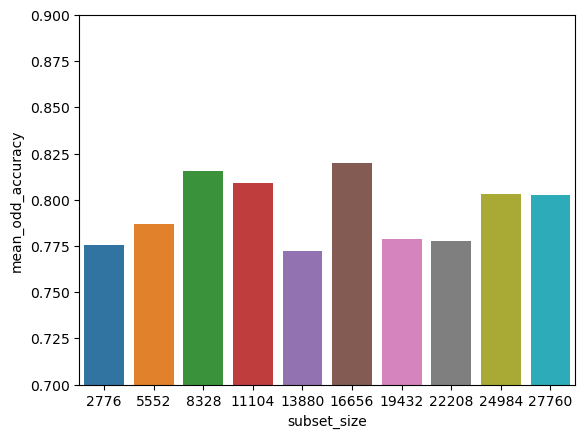

In [12]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'])
plot.set(ylim=(0.7, 0.9))

[(0.4, 0.6)]

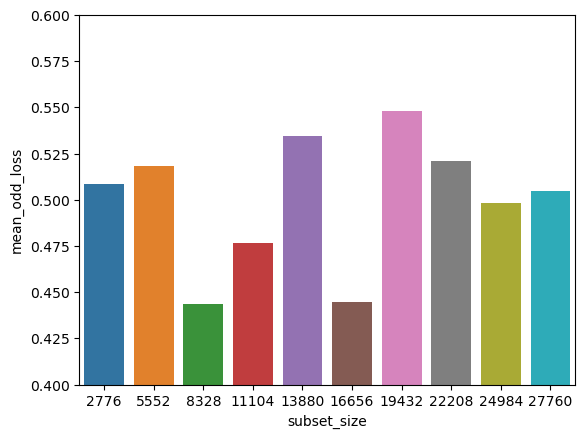

In [13]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])
plot.set(ylim=(0.4, 0.6))

[(0.4, 0.9)]

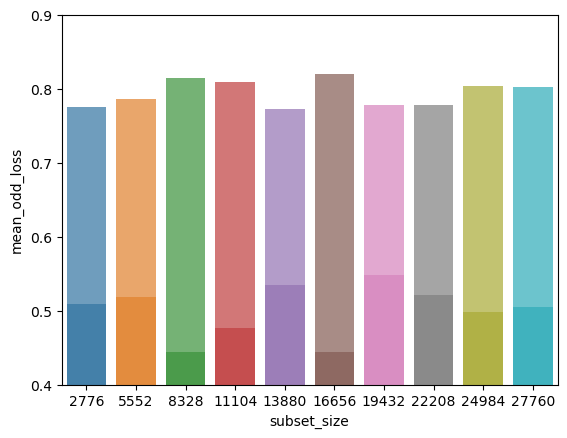

In [14]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.9))


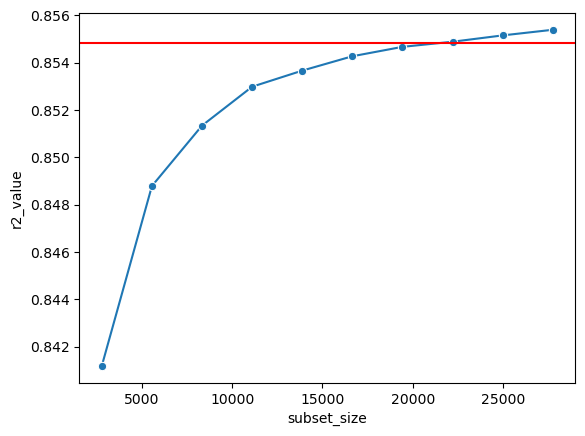

In [15]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')

<Axes: xlabel='subset_size', ylabel='imdb_accuracy'>

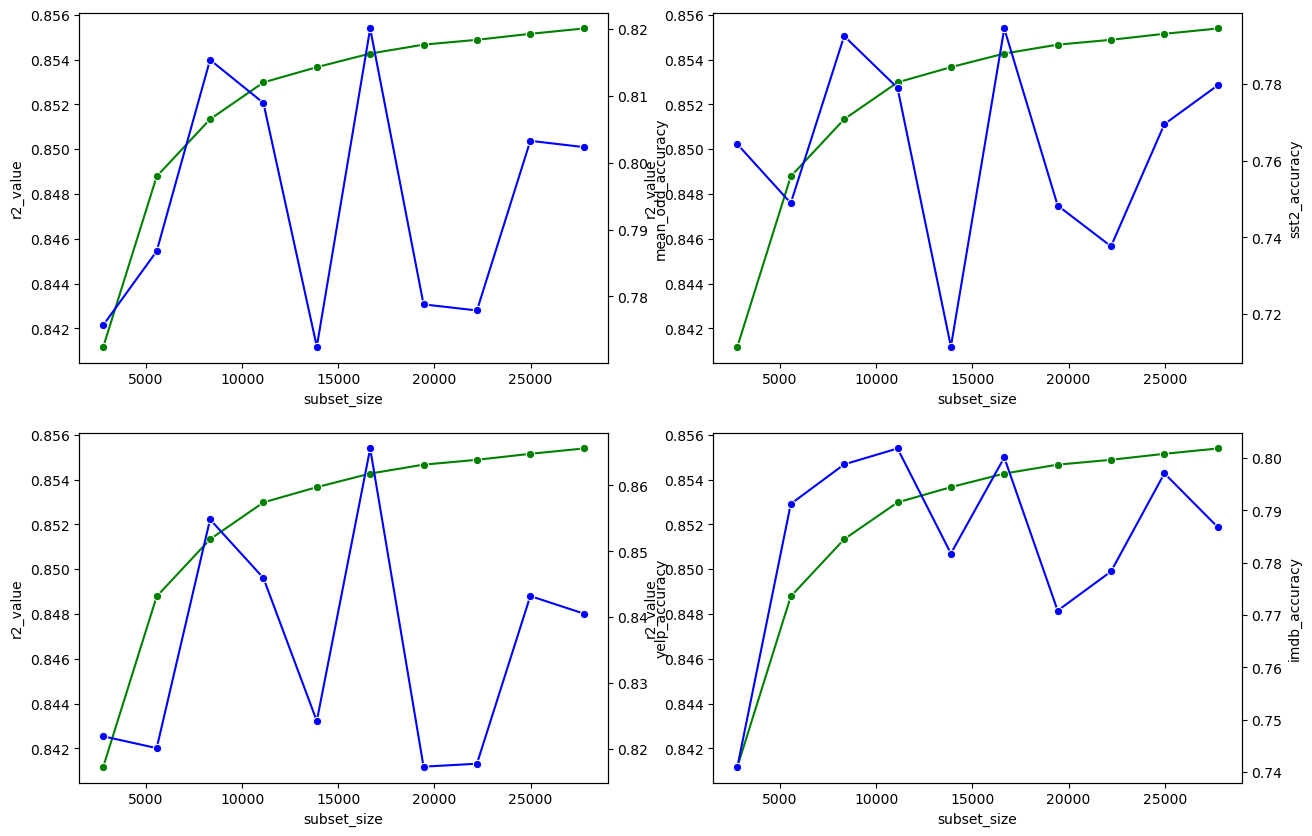

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][0], marker="o")
ax1 = axes[0][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], color="b", ax=ax1, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][1], marker="o")
ax2 = axes[0][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['sst2_accuracy'], color="b", ax=ax2, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][0], marker="o")
ax3 = axes[1][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['yelp_accuracy'], color="b", ax=ax3, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][1], marker="o")
ax4 = axes[1][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['imdb_accuracy'], color="b", ax=ax4, marker="o")